In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data
from matplotlib import pyplot as plt
from datetime import date

In [2]:
start = date(date.today().year-2, date.today().month, date.today().day)
end = date.today()
msft = data.DataReader("MSFT", start=start, end=end, data_source="yahoo")

In [3]:
msft.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-08-17,107.900002,106.690002,107.360001,107.580002,18061500.0,104.976585
2018-08-20,107.900002,106.480003,107.510002,106.870003,17914200.0,104.283783
2018-08-21,107.349998,105.849998,106.919998,105.980003,22881900.0,103.415314
2018-08-22,107.339996,105.779999,105.849998,107.059998,18000600.0,104.469170
2018-08-23,108.180000,106.870003,107.150002,107.559998,18167700.0,104.957062


In [4]:
aapl = data.DataReader("AAPL", start=start, end=end, data_source="yahoo")

In [5]:
aapl.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-08-17,217.949997,213.160004,213.440002,217.580002,35427000.0,212.150299
2018-08-20,219.179993,215.110001,218.100006,215.460007,30287700.0,210.083221
2018-08-21,217.190002,214.029999,216.800003,215.039993,26159800.0,209.673691
2018-08-22,216.360001,213.839996,214.100006,215.050003,19018100.0,209.683456
2018-08-23,217.050003,214.600006,214.649994,215.490005,18883200.0,210.112488


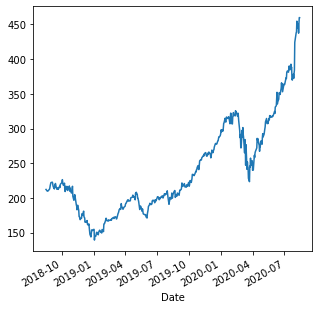

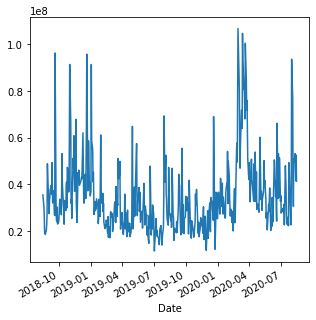

In [6]:
plt.figure(figsize=(5,5))
aapl["Adj Close"].plot()
plt.figure(figsize=(5,5))
aapl.Volume.plot()


In [8]:
# Yearly average number of shares outstanding for MSFT, AAPL
msft_shares = {2018: 7794e6, 2019: 7753e6, 2020: 7683e6}
aapl_shares = {2018: 5000e6, 2019: 4649e6, 2020: 4355e6}

In [9]:
msft["Year"]=msft.index.year
msft.reset_index(level=0, inplace=True)
msft.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close,Year
0,2018-08-17,107.900002,106.690002,107.360001,107.580002,18061500.0,104.976585,2018
1,2018-08-20,107.900002,106.480003,107.510002,106.870003,17914200.0,104.283783,2018
2,2018-08-21,107.349998,105.849998,106.919998,105.980003,22881900.0,103.415314,2018
3,2018-08-22,107.339996,105.779999,105.849998,107.059998,18000600.0,104.469170,2018
4,2018-08-23,108.180000,106.870003,107.150002,107.559998,18167700.0,104.957062,2018


In [10]:
msft["cap"]=0

for i, year in enumerate(msft["Year"]):
    shares = msft_shares.get(year)
    msft.cap.iloc[i] = shares * msft["Adj Close"].iloc[i]

C:\Users\chiugabr\Anaconda3\envs\finpy\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [11]:
msft.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close,Year,cap
0,2018-08-17,107.900002,106.690002,107.360001,107.580002,18061500.0,104.976585,2018,8.181875e+11
1,2018-08-20,107.900002,106.480003,107.510002,106.870003,17914200.0,104.283783,2018,8.127878e+11
2,2018-08-21,107.349998,105.849998,106.919998,105.980003,22881900.0,103.415314,2018,8.060190e+11
3,2018-08-22,107.339996,105.779999,105.849998,107.059998,18000600.0,104.469170,2018,8.142327e+11
4,2018-08-23,108.180000,106.870003,107.150002,107.559998,18167700.0,104.957062,2018,8.180353e+11


In [12]:
aapl["Year"]=aapl.index.year
aapl.reset_index(level=0,inplace=True)
aapl["cap"]=0

for i, year in enumerate(aapl["Year"]):
    shares = aapl_shares.get(year)
    aapl.cap.iloc[i]=shares*aapl["Adj Close"].iloc[i]

C:\Users\chiugabr\Anaconda3\envs\finpy\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
merged = msft.merge(aapl, how="inner", on="Date")
merged.head(5)

,Date,High_x,Low_x,Open_x,Close_x,Volume_x,Adj Close_x,Year_x,cap_x,High_y,Low_y,Open_y,Close_y,Volume_y,Adj Close_y,Year_y,cap_y
0,2018-08-17,107.900002,106.690002,107.360001,107.580002,18061500.0,104.976585,2018,8.181875e+11,217.949997,213.160004,213.440002,217.580002,35427000.0,212.150299,2018,1.060751e+12
1,2018-08-20,107.900002,106.480003,107.510002,106.870003,17914200.0,104.283783,2018,8.127878e+11,219.179993,215.110001,218.100006,215.460007,30287700.0,210.083221,2018,1.050416e+12
2,2018-08-21,107.349998,105.849998,106.919998,105.980003,22881900.0,103.415314,2018,8.060190e+11,217.190002,214.029999,216.800003,215.039993,26159800.0,209.673691,2018,1.048368e+12
3,2018-08-22,107.339996,105.779999,105.849998,107.059998,18000600.0,104.469170,2018,8.142327e+11,216.360001,213.839996,214.100006,215.050003,19018100.0,209.683456,2018,1.048417e+12
4,2018-08-23,108.180000,106.870003,107.150002,107.559998,18167700.0,104.957062,2018,8.180353e+11,217.050003,214.600006,214.649994,215.490005,18883200.0,210.112488,2018,1.050562e+12


In [14]:
merged.rename(columns={"cap_x":"msft_cap", "cap_y":"aapl_cap"},inplace=True)
select = merged[["Date","msft_cap","aapl_cap"]]

In [15]:
select.msft_cap = select.msft_cap/1e9
select.aapl_cap = select.aapl_cap/1e9

C:\Users\chiugabr\Anaconda3\envs\finpy\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


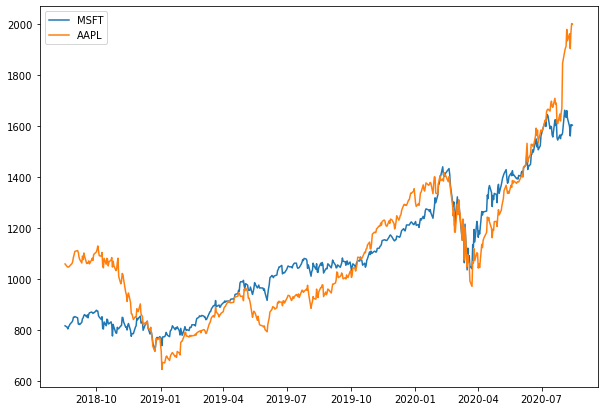

In [16]:
plt.figure(figsize=(10,7))
plt.plot(select.Date, select.msft_cap, label="MSFT")
plt.plot(select.Date, select.aapl_cap, label="AAPL")
plt.legend()
# market cap over time

In [19]:
import fbprophet

msft = msft.rename(columns={"Date":"ds","cap":"y"})
msft.y = msft.y/1e9

msft_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
msft_prophet.fit(msft)

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


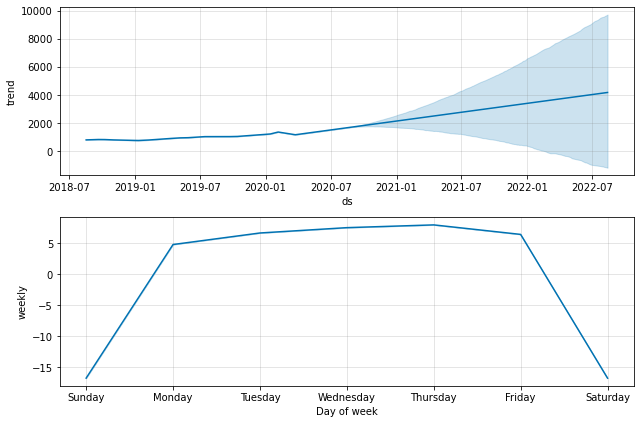

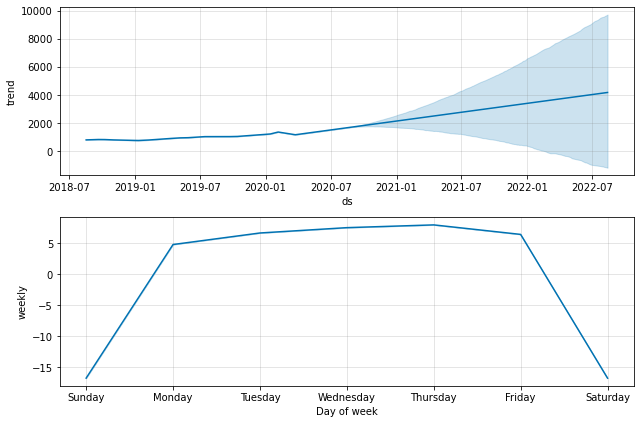

In [55]:
msft_prophet.plot_components(msftForecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


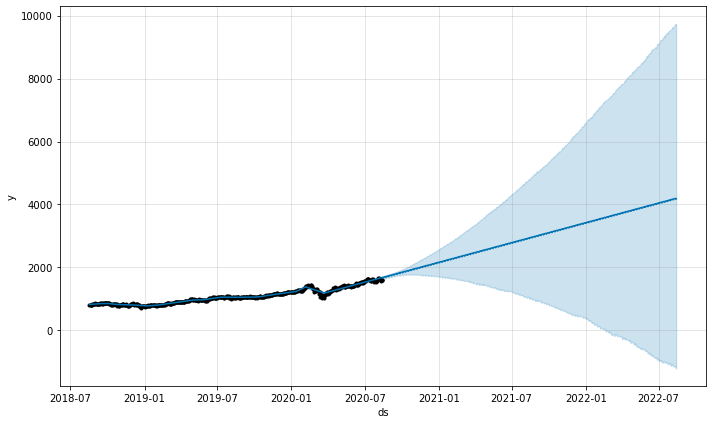

In [29]:
msft_prophet = fbprophet.Prophet(changepoint_prior_scale=0.5)
msftForecast = msft_prophet.fit(msft).predict(msft_prophet.make_future_dataframe(periods=(365*2),freq="D"))
fig = msft_prophet.plot(msftForecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


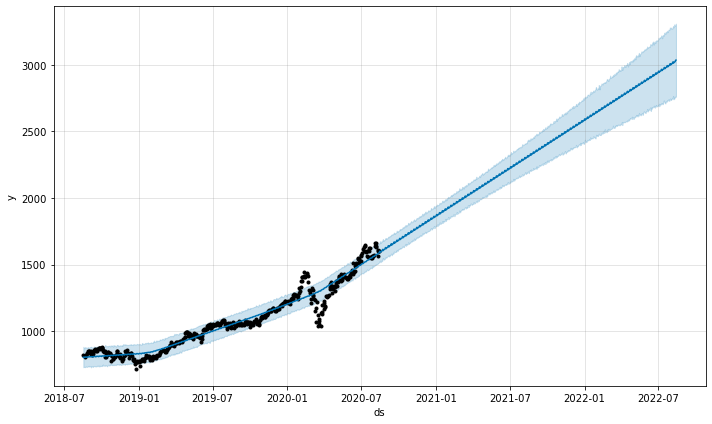

In [27]:
msft_prophet = fbprophet.Prophet(changepoint_prior_scale=0.01)
msftForecast = msft_prophet.fit(msft).predict(msft_prophet.make_future_dataframe(periods=(365*2),freq="D"))
fig = msft_prophet.plot(msftForecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


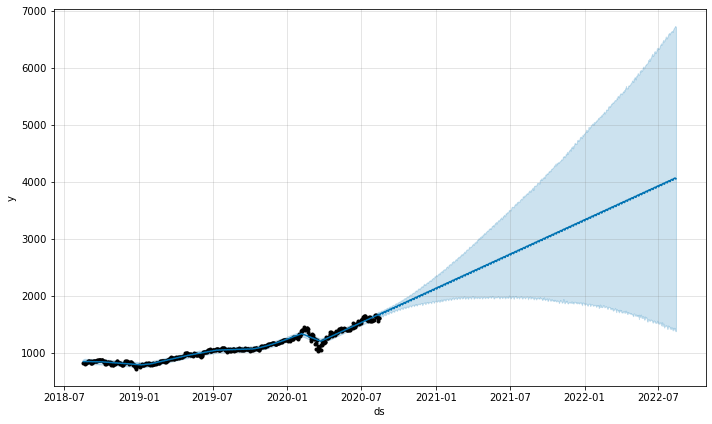

In [28]:
msft_prophet = fbprophet.Prophet(changepoint_prior_scale=0.1)
msftForecast = msft_prophet.fit(msft).predict(msft_prophet.make_future_dataframe(periods=(365*2),freq="D"))
fig = msft_prophet.plot(msftForecast)